In [49]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import yfinance as yf
import vectorbt as vbt
from datetime import datetime
from numba import njit

In [9]:
data = pd.DataFrame()
data = data.ta.ticker(
     "AAPL",
     start=datetime(2021, 3, 1),
     end=datetime(2021, 3, 15),
     interval='1h'
)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-03-01 09:30:00-05:00,123.500000,125.250000,122.790001,125.084999,30763287,0,0
2021-03-01 10:30:00-05:00,125.084999,126.154999,124.880096,125.879898,15870701,0,0
2021-03-01 11:30:00-05:00,125.879997,126.620003,125.789902,126.230003,13509856,0,0
2021-03-01 12:30:00-05:00,126.239998,126.400002,125.669998,126.209297,8484702,0,0
2021-03-01 13:30:00-05:00,126.205002,127.230003,126.089996,127.105003,11084566,0,0
...,...,...,...,...,...,...,...
2021-03-12 12:30:00-05:00,120.849800,121.070000,120.427002,120.896698,8122057,0,0
2021-03-12 13:30:00-05:00,120.889999,121.010002,120.500000,120.589996,6602156,0,0
2021-03-12 14:30:00-05:00,120.595001,120.900002,120.464996,120.754997,7340616,0,0
2021-03-12 15:30:00-05:00,120.760002,121.169998,120.680000,121.040100,7978422,0,0


In [14]:
gbm_data = vbt.GBMData.download( # Supports various (random) data generators, such as GBM
    list(range(5)),
    start='2020-01-01',
    end='2021-01-01'
)
gbm_data.plot(showlegend=False)

FigureWidget({
    'data': [{'name': '0',
              'showlegend': True,
              'type': 'scatter',
 …

In [18]:
"""
Data preparation: Transformation, rescaling, and normalization of data.
Custom splitters for cross-validation. Supports Scikit-Learn splitters,
such as for K-Folds cross-validation.
"""
from datetime import datetime, timedelta

index = [datetime(2020, 1, 1) + timedelta(days=i) for i in range(10)]
sr = pd.Series(np.arange(len(index)), index=index)
sr.vbt.rolling_split(
    window_len=5,
    set_lens=(1, 1),
    left_to_right=False,
    plot=True,
    trace_names=['train', 'valid', 'test']
)

FigureWidget({
    'data': [{'colorscale': [[0.0, '#1f77b4'], [1.0, '#1f77b4']],
              'hoverongaps': …

In [20]:
# Identify local extrema
price = np.cumprod(np.random.uniform(-0.1, 0.1, size=100) + 1)
vbt.LEXLB.run(price, 0.2, 0.2).plot()

FigureWidget({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
               …

In [21]:
# support pandas ta and ta-lib
# compite 2 mav

price = pd.Series([1, 2, 3, 4, 5], dtype=float)
vbt.MA.run(price, [2, 3]).ma # built in

ma_window,2,3
0,NaN,NaN
1,1.5,NaN
2,2.5,2.0
3,3.5,3.0
4,4.5,4.0


In [24]:
vbt.pandas_ta('SMA').run(price, [2, 3]).sma

sma_length,2,3
0,NaN,NaN
1,1.5,NaN
2,2.5,2.0
3,3.5,3.0
4,4.5,4.0


In [30]:
# create your own complexity indicator under vectorbt engine

@njit
def apply_func_nb(input_shape, start, mu, sigma):
    rand_returns = np.random.normal(mu, sigma, input_shape)
    return start * vbt.nb.nancumprod_nb(rand_returns + 1)

RandomInd = vbt.IndicatorFactory(
    param_names=['start', 'mu', 'sigma'],
    output_names=['output']
).from_apply_func(
    apply_func_nb,
    require_input_shape=True,
    seed=42
)

RandomInd.run(5, [100, 200], [-0.01, 0.01], 0.01).output

custom_start,100,200
custom_mu,-0.01,0.01
custom_sigma,0.01,0.01
0,99.496714,201.531726
1,98.364179,206.729658
2,98.017630,210.383470
3,98.530292,211.499608
4,97.314277,214.762117


In [35]:
# Signal analysis: Generation, mapping and reducing, 
# ranking, and distribution analysis of entry and exit signals.

mark_sr = pd.Series([True, True, True, False, True, True])
mark_sr.vbt.signals.partition_ranges().duration.values

array([3, 2])

In [41]:
# Signal generator: Random and stop loss (SL, TSL, TP, etc.)

rprobnx = vbt.RPROBNX.run(
    input_shape=(5,),
    entry_prob=[0.5, 1],
    exit_prob=[0.5, 1],
    param_product=True,
    seed=42
)

rprobnx.entries

rprobnx_entry_prob    0.5           1.0       
rprobnx_exit_prob     0.5    1.0    0.5    1.0
0                    True   True   True   True
1                   False  False  False  False
2                   False  False  False   True
3                   False  False  False  False
4                   False  False   True   True

In [42]:
rprobnx.exits

rprobnx_entry_prob    0.5           1.0       
rprobnx_exit_prob     0.5    1.0    0.5    1.0
0                   False  False  False  False
1                   False   True  False   True
2                   False  False  False  False
3                   False  False   True   True
4                    True  False  False  False

In [51]:
# Portfolio modeling
# backtest the Golden Cross

price = vbt.YFData.download('BTC-USD', start='2018-01-01').get('Close')
fast_ma = vbt.MA.run(price, 50, short_name='fast_ma')
slow_ma = vbt.MA.run(price, 200, short_name='slow_ma')
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
pf = vbt.Portfolio.from_signals(price, entries, exits, fees=0.005)

pf.orders.records_readable
# error fix buy update buy TA-lib acess denied.

AttributeError: 'MA' object has no attribute 'ma_crossed_above'

In [53]:
price = vbt.YFData.download('BTC-USD').get('Close')
returns = price.vbt.to_returns()
returns.vbt.returns.qs.plot_snapshot()

ModuleNotFoundError: No module named 'quantstats'

In [54]:
index = [datetime(2020, 1, 1) + timedelta(days=i) for i in range(7)]
mask = pd.Series([False, True, True, True, False, True, False])
mask.vbt.signals(freq='d').stats()

Start                                               0
End                                                 6
Period                                7 days 00:00:00
Total                                               4
Rate [%]                                    57.142857
First Index                                         1
Last Index                                          5
Norm Avg Index [-1, 1]                      -0.083333
Distance: Min                         1 days 00:00:00
Distance: Max                         2 days 00:00:00
Distance: Mean                        1 days 08:00:00
Distance: Std               0 days 13:51:23.063257983
Total Partitions                                    2
Partition Rate [%]                               50.0
Partition Length: Min                 1 days 00:00:00
Partition Length: Max                 3 days 00:00:00
Partition Length: Mean                2 days 00:00:00
Partition Length: Std       1 days 09:56:28.051789035
Partition Distance: Min     

In [55]:
price = vbt.YFData.download('BTC-USD').get('Close')
entry_trades = vbt.Portfolio.from_random_signals(price, n=5).entry_trades
returns_pd = entry_trades.returns.to_pd()
returns_pd[~returns_pd.isnull()]

Date
2015-09-17 00:00:00+00:00   -0.184730
2016-02-20 00:00:00+00:00    0.888455
2018-10-12 00:00:00+00:00   -0.084516
2021-03-15 00:00:00+00:00    4.239867
2021-08-05 00:00:00+00:00   -0.183440
dtype: float64

In [57]:
# Plot 3 deepest price dips
price = vbt.YFData.download('BTC-USD').get('Close')
price.vbt.drawdowns.plot(top_n=3)

FigureWidget({
    'data': [{'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showl…

In [61]:
# Plot time series against each other
sr1 = pd.Series(np.cumprod(np.random.normal(0, 0.01, 100) + 1))
sr2 = pd.Series(np.cumprod(np.random.normal(0, 0.01, 100) + 1))
sr1.vbt.plot_against(sr2)

FigureWidget({
    'data': [{'hoverinfo': 'skip',
              'line': {'color': 'rgba(0, 0, 0, 0)', 'width':…

In [62]:
# Plot a volume
volume_widget = vbt.plotting.Volume(
    data=np.random.randint(1, 10, size=(3,3,3)),
    x_labels=['a', 'b', 'c'],
    y_labels=['d', 'e', 'f'],
    z_labels=['g', 'h', 'i']
)
volume_widget.fig

FigureWidget({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
               …

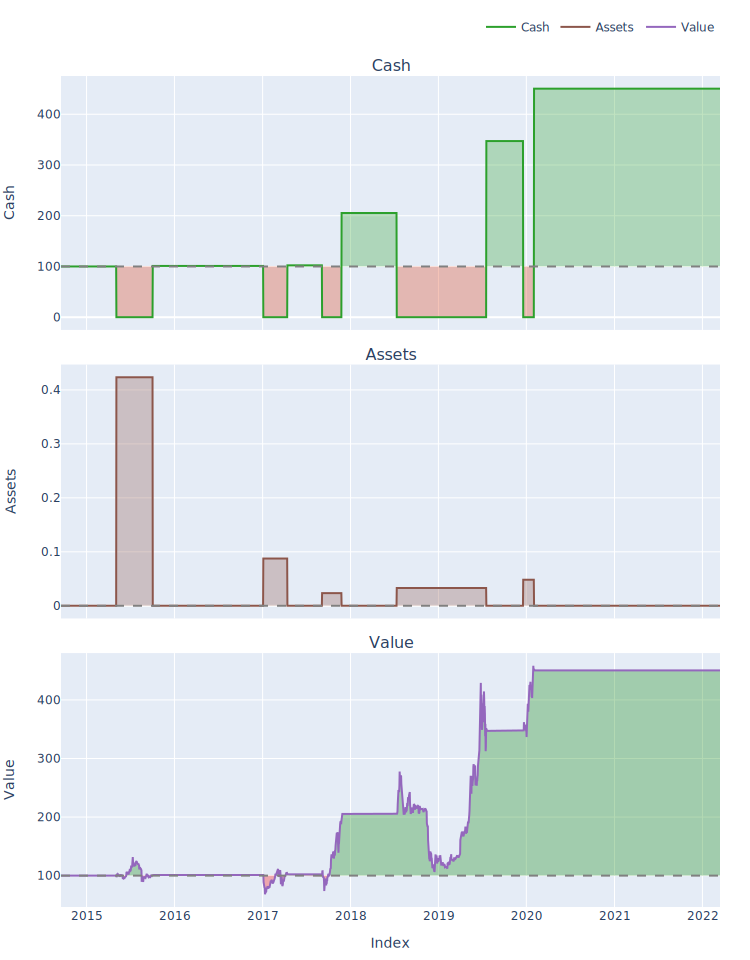

In [63]:
price = vbt.YFData.download('BTC-USD').get('Close')
pf = vbt.Portfolio.from_random_signals(price, n=5)
pf.plot(subplots=['cash', 'assets', 'value']).show_svg()

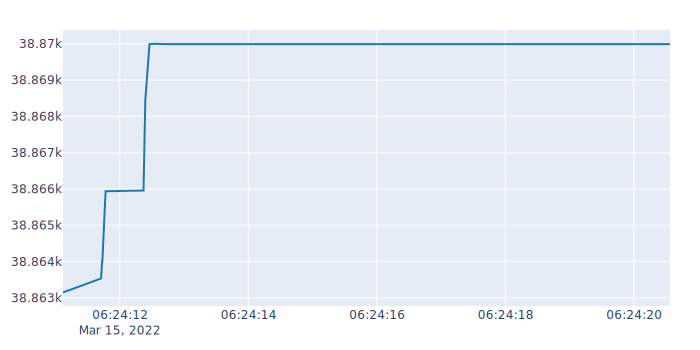

In [68]:
# Every 10 seconds display the latest Bitcoin trades on Binance
from vectorbt.utils.datetime_ import datetime_to_ms, to_tzaware_datetime, get_utc_tz
from IPython.display import SVG, display, clear_output
import ccxt

exchange = ccxt.binance()

def job_func():
    since = datetime_to_ms(to_tzaware_datetime('10 seconds ago UTC', tz=get_utc_tz()))
    trades = exchange.fetch_trades('BTC/USDT', since)
    price = pd.Series({t['datetime']: t['price'] for t in trades})
    svg = price.vbt.plot().to_image(format="svg")
    clear_output()
    display(SVG(svg))
    
scheduler = vbt.ScheduleManager()
scheduler.every(10, 'seconds').do(job_func)
scheduler.start()

### Usage

In [69]:
import vectorbt as vbt

price = vbt.YFData.download('BTC-USD').get('Close')
pf = vbt.Portfolio.from_holding(price, init_cash=100)
pf.total_profit()

8402.134343294616

In [71]:
import numpy as np

symbols = ["BTC-USD", "ETH-USD"]
price = vbt.YFData.download(symbols, missing_index='drop').get('Close')

n = np.random.randint(10, 101, size=1000).tolist()
pf = vbt.Portfolio.from_random_signals(price, n=n, init_cash=100, seed=42)

mean_expectancy = pf.trades.expectancy().groupby(['randnx_n', 'symbol']).mean()
fig = mean_expectancy.unstack().vbt.scatterplot(xaxis_title='randnx_n', yaxis_title='mean_expectancy')
fig.show()


C:\Users\A715-72G\anaconda3\lib\site-packages\vectorbt\data\base.py:526: UserWarning:

Symbols have mismatching index. Dropping missing data points.

